## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:/traffic')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'D:\\traffic'

## Preprocess the images

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [9]:
data = np.array(data)
labels = np.array(labels)



## Save Labels & Data for future use

In [11]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [12]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [13]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [16]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [18]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 81s 82ms/step - loss: 2.0400 - accuracy: 0.4852 - val_loss: 0.6462 - val_accuracy: 0.8512
Epoch 2/20
981/981 [==============================] - 91s 93ms/step - loss: 0.7583 - accuracy: 0.7787 - val_loss: 0.2751 - val_accuracy: 0.9181
Epoch 3/20
981/981 [==============================] - 80s 81ms/step - loss: 0.5183 - accuracy: 0.8471 - val_loss: 0.1707 - val_accuracy: 0.9529
Epoch 4/20
981/981 [==============================] - 87s 88ms/step - loss: 0.3977 - accuracy: 0.8841 - val_loss: 0.1452 - val_accuracy: 0.9560
Epoch 5/20
981/981 [==============================] - 85s 86ms/step - loss: 0.3099 - accuracy: 0.9094 - val_loss: 0.1180 - val_accuracy: 0.9672
Epoch 6/20
981/981 [==============================] - 83s 85ms/step - loss: 0.3017 - accuracy: 0.9147 - val_loss: 0.0888 - val_accuracy: 0.9758
Epoch 7/20
981/981 [==============================] - 92s 94ms/step - loss: 0.2805 - accuracy: 0.9223 - val_loss: 0.0797 - val_accuracy:

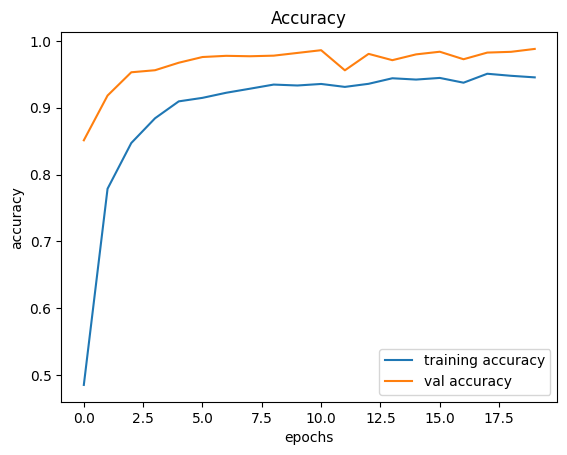

In [20]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

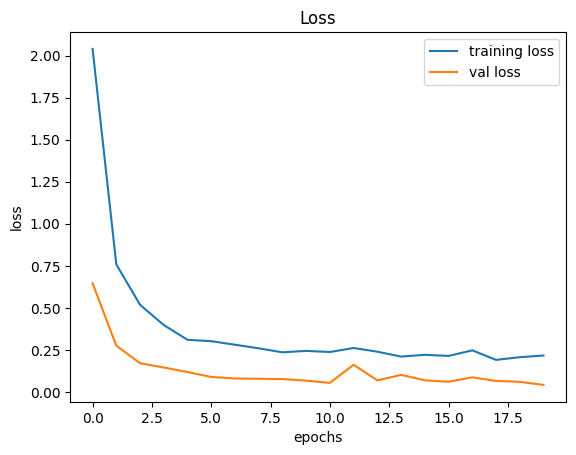

In [21]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [22]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [23]:
X_test, label = testing('Test.csv')

In [25]:
Y_pred = model.predict(X_test)
Y_pred

395/395 [==============================] - 7s 17ms/step


array([[1.30180886e-32, 2.21845591e-20, 2.38352303e-23, ...,
        1.21363264e-09, 5.95428879e-21, 7.27499707e-23],
       [4.06218988e-22, 1.00000000e+00, 3.07206170e-11, ...,
        7.02773981e-34, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.48874630e-06, 2.91474480e-02, 5.85295679e-03, ...,
        4.47165257e-05, 3.66498725e-08, 1.70726358e-04],
       [4.47882426e-11, 1.04311976e-05, 5.79297421e-07, ...,
        1.18925958e-09, 6.79931348e-19, 9.46282289e-12],
       [7.69679182e-11, 8.94410789e-07, 1.46581142e-05, ...,
        8.36406525e-06, 3.61969374e-12, 1.00517816e-07]], dtype=float32)

## Accuracy with the test data

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9403008709422012


## Save the model

In [26]:
model.save("./training/TSR.h5")

## Load the Model

In [2]:
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [3]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Bumpy road


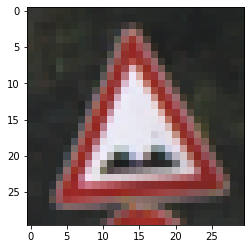

In [13]:
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()